# ML Assignment 1

**1.Regression with L2 Regularization** 

**-> Loading the Dataset**

In [1]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target  

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (569, 30)
y shape: (569,)


**-> Split into test and train**

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (455, 30)
X_test shape: (114, 30)


**-> Objective of Logistic regression with L2 regularization**

L2 Regularization(*Ridge*) is one of the regularizaion technique to reduce **overfitting** by adding a penality term to the loss function that is proportional to the square of the weights.
It shrinks weights towards zero(but not exactly zero), reduce complexity and improve generalization.

**J(w)=−N1•i=1∑N•[yi•logy^•i•+(1−yi•)log(1−y^•i•)]+2λ•∣∣w∣∣2**

Where:



**y^i** is the predicted probability.

**λ** is the regularization parameter controlling weight shrinkage.

**L2** prevents overfitting by penalizing large weights.

**-> Varying the learning parameter(λ)**

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

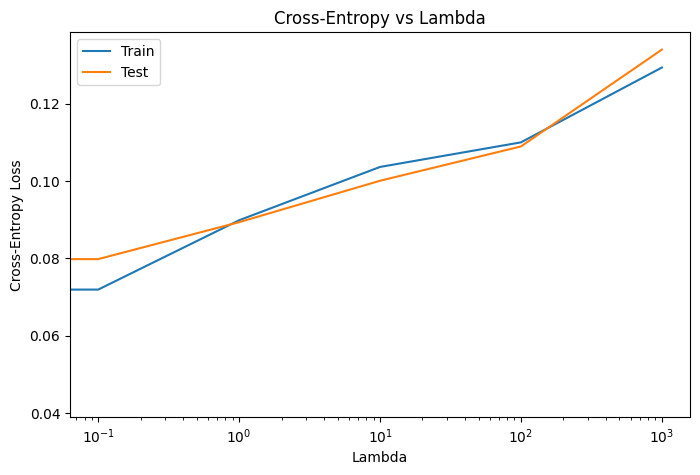

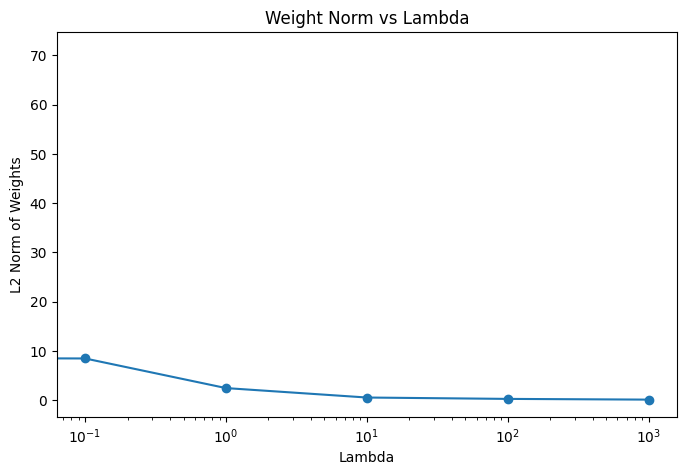

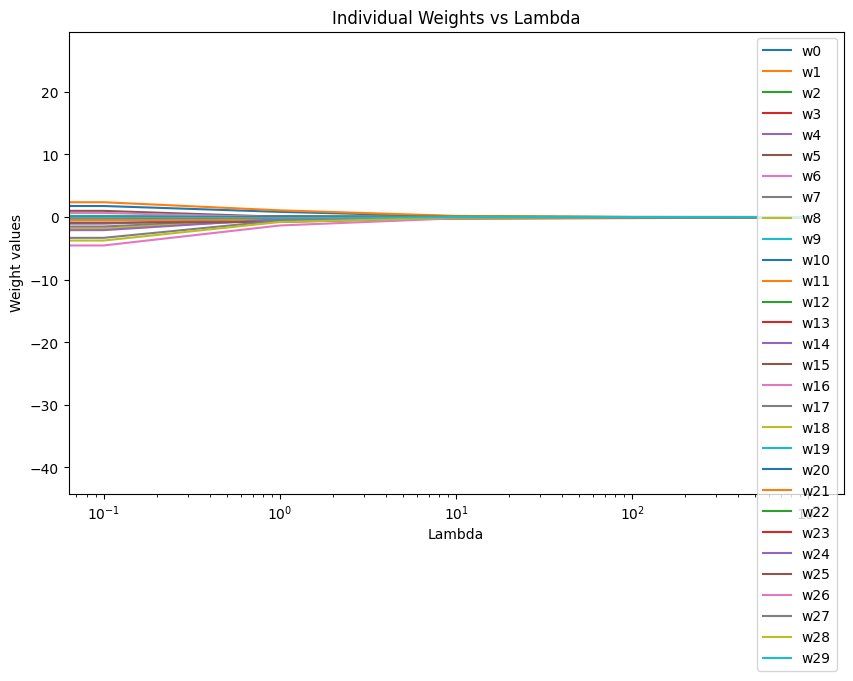

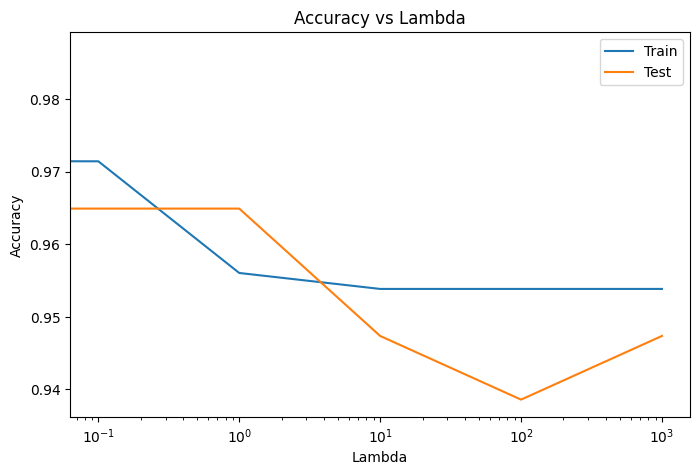

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, accuracy_score
import matplotlib.pyplot as plt

lambdas = [0, 0.1, 1, 10, 100, 1000]
train_loss, test_loss, train_acc, test_acc, w_norms = [], [], [], [], []
weights_list = []

for lam in lambdas:
    # Note: sklearn uses C = 1/lambda
    C = 1.0 / lam if lam != 0 else 1e12  # large C for lambda=0
    clf = LogisticRegression(
        penalty='l2', C=C, solver='lbfgs', max_iter=5000
    )
    clf.fit(X_train, y_train)
    
    y_train_pred_prob = clf.predict_proba(X_train)
    y_test_pred_prob = clf.predict_proba(X_test)
    
    train_loss.append(log_loss(y_train, y_train_pred_prob))
    test_loss.append(log_loss(y_test, y_test_pred_prob))
    
    train_acc.append(accuracy_score(y_train, clf.predict(X_train)))
    test_acc.append(accuracy_score(y_test, clf.predict(X_test)))
    
    w_norms.append(np.linalg.norm(clf.coef_))
    weights_list.append(clf.coef_[0])

# Plot Cross-Entropy Loss
plt.figure(figsize=(8,5))
plt.plot(lambdas, train_loss, label="Train")
plt.plot(lambdas, test_loss, label="Test")
plt.xscale('log')
plt.xlabel("Lambda")
plt.ylabel("Cross-Entropy Loss")
plt.title("Cross-Entropy vs Lambda")
plt.legend()
plt.show()

# Plot L2 Norm of Weights
plt.figure(figsize=(8,5))
plt.plot(lambdas, w_norms, marker='o')
plt.xscale('log')
plt.xlabel("Lambda")
plt.ylabel("L2 Norm of Weights")
plt.title("Weight Norm vs Lambda")
plt.show()

# Plot Individual Weights
weights_array = np.array(weights_list)
plt.figure(figsize=(10,6))
for i in range(weights_array.shape[1]):
    plt.plot(lambdas, weights_array[:,i], label=f"w{i}")
plt.xscale('log')
plt.xlabel("Lambda")
plt.ylabel("Weight values")
plt.title("Individual Weights vs Lambda")
plt.legend()
plt.show()

# Plot Accuracy
plt.figure(figsize=(8,5))
plt.plot(lambdas, train_acc, label="Train")
plt.plot(lambdas, test_acc, label="Test")
plt.xscale('log')
plt.xlabel("Lambda")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Lambda")
plt.legend()
plt.show()


Observation:

As λ increases, weight norm decreases (regularization effect).

Small λ → potential overfitting (train accuracy high, test lower).

Large λ → underfitting (both train & test accuracy decrease).

Cross-entropy shows similar trend: U-shaped curve.

**-> Gaussian Basis Functions**

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/d

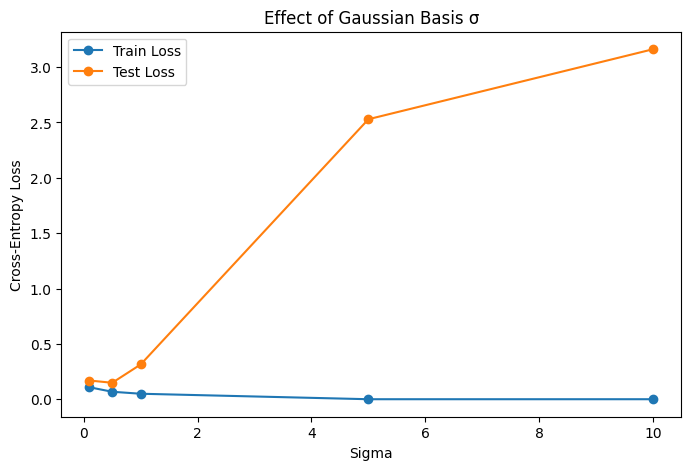

In [4]:
def gaussian_basis(X, num_basis=5, sigma=1.0, x_min=-10, x_max=10):
    n_samples, n_features = X.shape
    mus = np.linspace(x_min, x_max, num_basis)
    X_new = []
    for i in range(n_features):
        xi = X[:, i].reshape(-1,1)
        # Apply all basis functions for this feature
        phi_i = np.exp(-0.5*((xi - mus)/sigma)**2)
        X_new.append(phi_i)
    return np.hstack(X_new)

sigma_values = [0.1, 0.5, 1, 5, 10]
train_loss_basis, test_loss_basis = [], []

for sigma in sigma_values:
    X_train_phi = gaussian_basis(X_train, sigma=sigma)
    X_test_phi = gaussian_basis(X_test, sigma=sigma)
    clf = LogisticRegression(penalty='none', solver='lbfgs', max_iter=5000)
    clf.fit(X_train_phi, y_train)
    train_loss_basis.append(log_loss(y_train, clf.predict_proba(X_train_phi)))
    test_loss_basis.append(log_loss(y_test, clf.predict_proba(X_test_phi)))

# Plot Training vs Testing Error
plt.figure(figsize=(8,5))
plt.plot(sigma_values, train_loss_basis, label="Train Loss", marker='o')
plt.plot(sigma_values, test_loss_basis, label="Test Loss", marker='o')
plt.xlabel("Sigma")
plt.ylabel("Cross-Entropy Loss")
plt.title("Effect of Gaussian Basis σ")
plt.legend()
plt.show()


Observation:

Small σ → very narrow basis → overfitting → train loss ↓, test loss ↑

Large σ → very wide basis → underfitting → both losses high

Optimal σ balances bias-variance trade-off.

**-> Regularized Regression with Basis Functions**

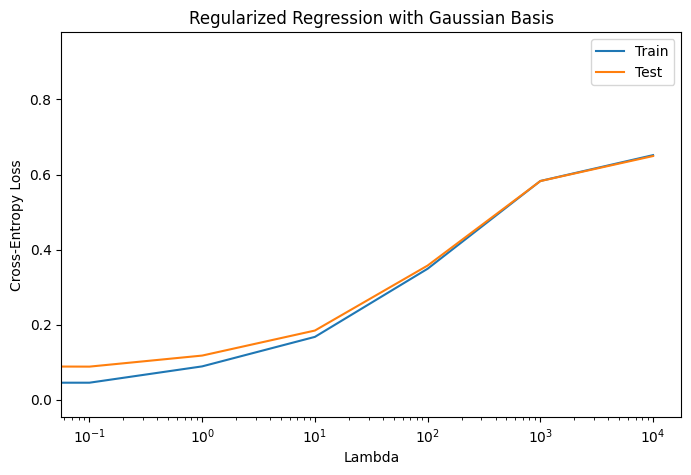

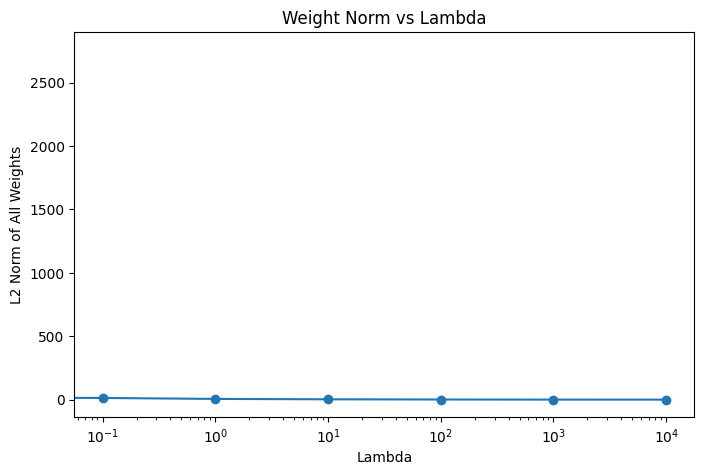

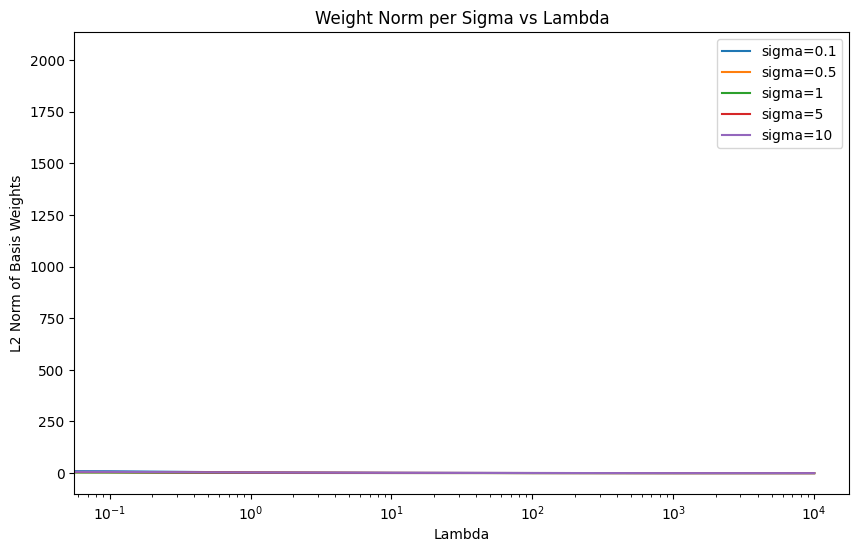

In [5]:
lambdas_ext = [0,0.1,1,10,100,1000,10000]
weights_norm_per_sigma = {s:[] for s in sigma_values}
train_loss_reg, test_loss_reg, w_norm_reg = [], [], []

# Combine all σ basis functions
X_train_all = np.hstack([gaussian_basis(X_train, sigma=s) for s in sigma_values])
X_test_all = np.hstack([gaussian_basis(X_test, sigma=s) for s in sigma_values])

for lam in lambdas_ext:
    C = 1.0/lam if lam !=0 else 1e12
    clf = LogisticRegression(penalty='l2', C=C, solver='lbfgs', max_iter=5000)
    clf.fit(X_train_all, y_train)
    
    train_loss_reg.append(log_loss(y_train, clf.predict_proba(X_train_all)))
    test_loss_reg.append(log_loss(y_test, clf.predict_proba(X_test_all)))
    w_norm_reg.append(np.linalg.norm(clf.coef_))
    
    # L2 norms per sigma
    start, end = 0, 0
    for s in sigma_values:
        X_phi = gaussian_basis(X_train, sigma=s)
        end = start + X_phi.shape[1]
        weights_norm_per_sigma[s].append(np.linalg.norm(clf.coef_[0,start:end]))
        start = end

# Plots
plt.figure(figsize=(8,5))
plt.plot(lambdas_ext, train_loss_reg, label="Train")
plt.plot(lambdas_ext, test_loss_reg, label="Test")
plt.xscale('log')
plt.xlabel("Lambda")
plt.ylabel("Cross-Entropy Loss")
plt.title("Regularized Regression with Gaussian Basis")
plt.legend()
plt.show()

plt.figure(figsize=(8,5))
plt.plot(lambdas_ext, w_norm_reg, marker='o')
plt.xscale('log')
plt.xlabel("Lambda")
plt.ylabel("L2 Norm of All Weights")
plt.title("Weight Norm vs Lambda")
plt.show()

plt.figure(figsize=(10,6))
for s in sigma_values:
    plt.plot(lambdas_ext, weights_norm_per_sigma[s], label=f"sigma={s}")
plt.xscale('log')
plt.xlabel("Lambda")
plt.ylabel("L2 Norm of Basis Weights")
plt.title("Weight Norm per Sigma vs Lambda")
plt.legend()
plt.show()


**-> Gaussian basis for capturing relationships:**

For multivariate relationships, use multidimensional Gaussians basis function that captures correlated input effects; 

too many → overfitting, 

too few → high bias.

**->Adaptive basis placement:**

Iteratively update weights w and basis centers μ:

Fix μ, optimize w via L2-regularized regression.

Fix w, update μ using gradient descent on error w.r.t μ.

Repeat until convergence.

**->Convergence:**

The algorithm converges to a local minimum, not global, because the objective is non-convex in μ.

Global optimum is not guaranteed due to multiple local minima in μ space.

**2.Linear Regression and its version and Logistic regression with data preprocessing on complex datasets**

* Linear Regression and its versions

In [7]:
# LINEAR REGRESSION & VARIANTS
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Data Preprocessing

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Simple Linear Regression
X_train_simple = X_train[:, [0]]
X_test_simple = X_test[:, [0]]
lr_simple = LinearRegression()
lr_simple.fit(X_train_simple, y_train)
y_pred_simple = lr_simple.predict(X_test_simple)
print("Simple Linear Regression R2:", r2_score(y_test, y_pred_simple))

# Multiple Linear Regression
lr_multi = LinearRegression()
lr_multi.fit(X_train, y_train)
y_pred_multi = lr_multi.predict(X_test)
print("Multiple Linear Regression R2:", r2_score(y_test, y_pred_multi))

# Polynomial Regression
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train[:, :2])  # Using first 2 features
X_test_poly = poly.transform(X_test[:, :2])
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly, y_train)
y_pred_poly = lr_poly.predict(X_test_poly)
print("Polynomial Regression R2:", r2_score(y_test, y_pred_poly))

# Regularized Versions
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
lasso = Lasso(alpha=0.01, max_iter=10000)
lasso.fit(X_train, y_train)

# Evaluating the regularization
print("Ridge R2:", r2_score(y_test, ridge.predict(X_test)))
print("Lasso R2:", r2_score(y_test, lasso.predict(X_test)))



Simple Linear Regression R2: 0.45885918903846656
Multiple Linear Regression R2: 0.575787706032451
Polynomial Regression R2: 0.5039986038552433
Ridge R2: 0.5758185345441327
Lasso R2: 0.581861244352776


* Logistic Regression

Accuracy: 0.9736842105263158

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



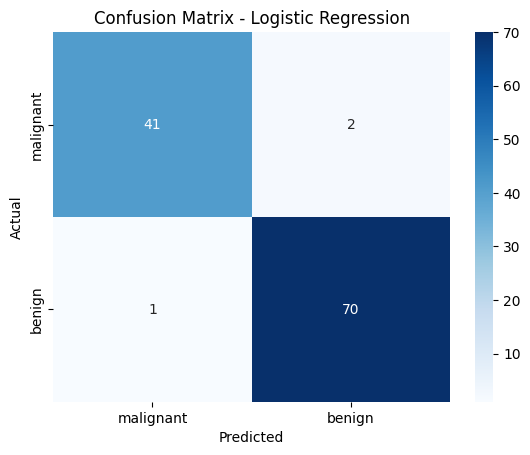

Cross-Validation Accuracy: 0.9806862288464524


In [8]:
# LOGISTIC REGRESSION (Classification)
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Data Preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Spliting dataset into test and train
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Logistic Regression
logreg = LogisticRegression(penalty='l2', C=1.0, solver='lbfgs', max_iter=1000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

# Evaluation matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.title("Confusion Matrix - Logistic Regression")
plt.ylabel('Actual'); plt.xlabel('Predicted')
plt.show()

# Cross-Validation Accuracy
cv_acc = cross_val_score(logreg, X_scaled, y, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy:", np.mean(cv_acc))
